<a href="https://colab.research.google.com/github/yiitdotdev/Earthquake-data-process/blob/main/Earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import pandas as pd
register_matplotlib_converters()

In [ ]:
earthquake_data = pd.read_csv("earthquakes.csv")

In [ ]:
# Convert 'Time' from string to datetime
earthquake_data['Time'] = pd.to_datetime(earthquake_data['Time'])

<function matplotlib.pyplot.show(close=None, block=None)>

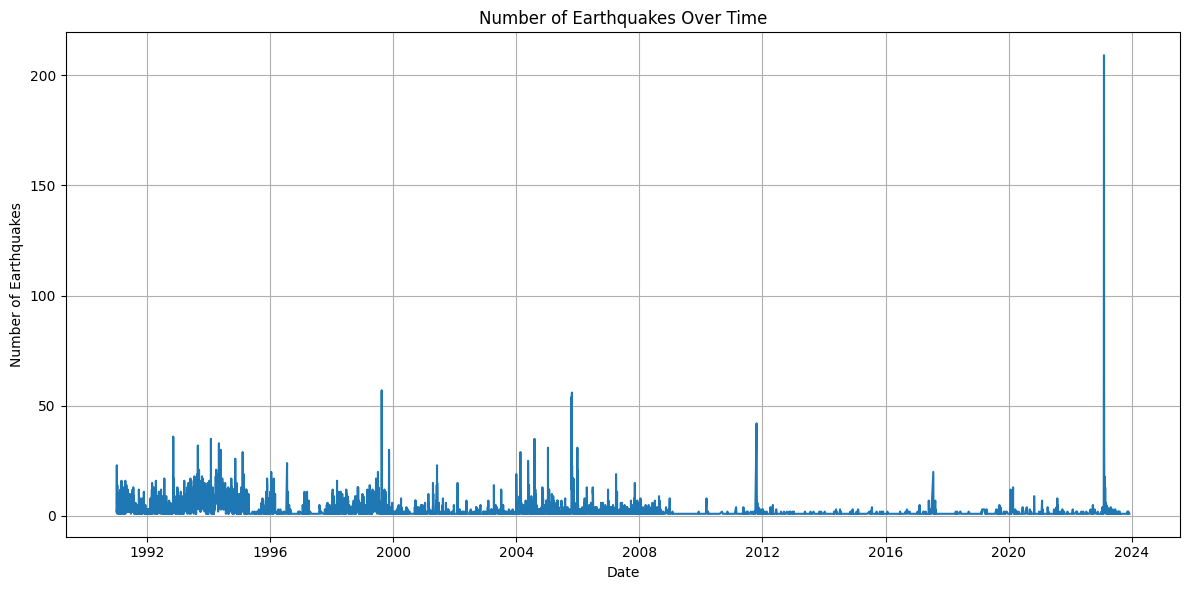

In [ ]:
# Creating a time series plot of earthquake occurrences
plt.figure(figsize=(12, 6))
earthquake_data['Time'].dt.date.value_counts().sort_index().plot(kind='line')
plt.title('Number of Earthquakes Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Earthquakes')
plt.grid(True)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

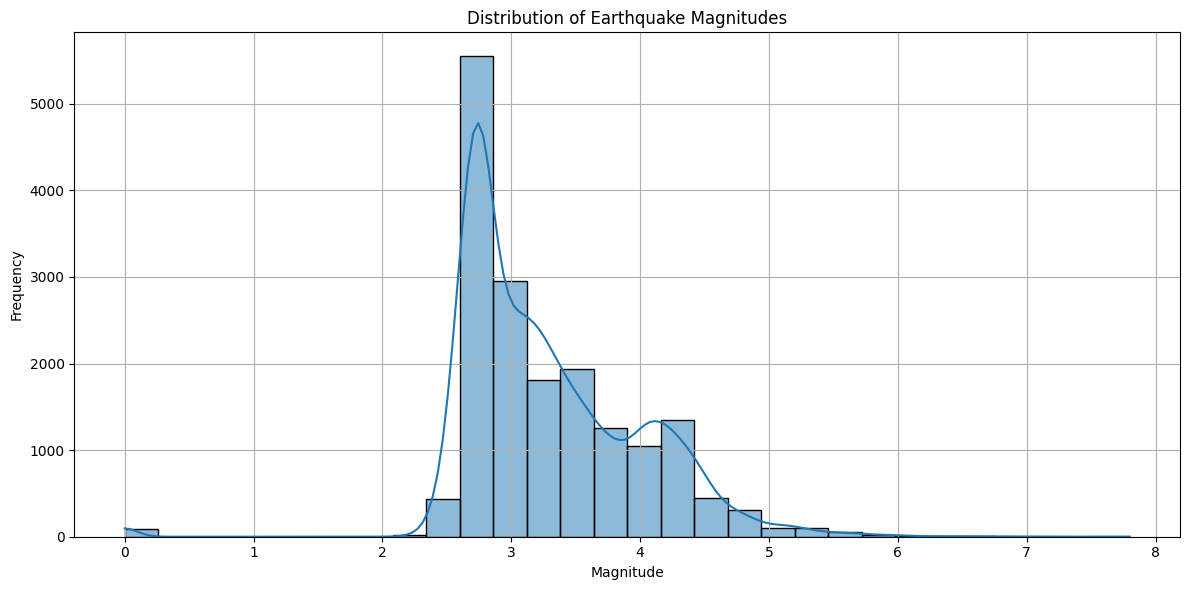

In [ ]:
# Creating a histogram of earthquake magnitudes
plt.figure(figsize=(12, 6))
sns.histplot(earthquake_data['Magnitude'], bins=30, kde=True)
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()

plt.show


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import numpy as np

In [ ]:
# Selecting features for clustering
features = earthquake_data[['Latitude', 'Longitude', 'Magnitude']]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determining the optimal number of clusters using the Elbow Method
inertia = []
silhouette_scores = []
K_range = range(2, 11)

# Removing rows with NaN values in the Magnitude column
cleaned_data = features.dropna()

# Re-checking for NaN values to ensure the data is clean
nan_counts_after_removal = cleaned_data.isna().sum()

# Scaling the cleaned data
scaled_cleaned_features = scaler.fit_transform(cleaned_data)

# Re-applying the Elbow Method and calculating silhouette scores on the cleaned data
inertia_cleaned = []
silhouette_scores_cleaned = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_cleaned_features)
    inertia_cleaned.append(kmeans.inertia_)
    silhouette_scores_cleaned.append(silhouette_score(scaled_cleaned_features, kmeans.labels_))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

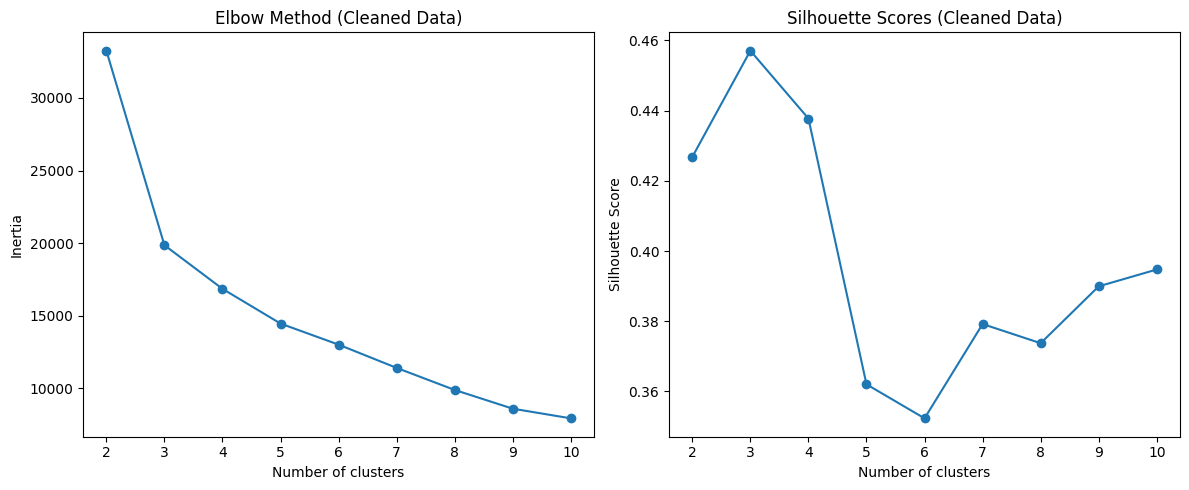

In [ ]:
# Plotting the Elbow Method and Silhouette scores for the cleaned data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_cleaned, marker='o')
plt.title('Elbow Method (Cleaned Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores_cleaned, marker='o')
plt.title('Silhouette Scores (Cleaned Data)')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
# Load the dataset (assuming the file path and the structure of the data)

earthquake_data = pd.read_csv("earthquakes.csv")

# Preprocess the data
earthquake_data = earthquake_data.dropna(subset=['Magnitude'])  # Remove rows with NaN in Magnitude
features = earthquake_data[['Latitude', 'Longitude', 'Magnitude']]  # Selecting features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Scaling the features

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
earthquake_data['Cluster'] = kmeans.labels_  # Assigning cluster labels to the original data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


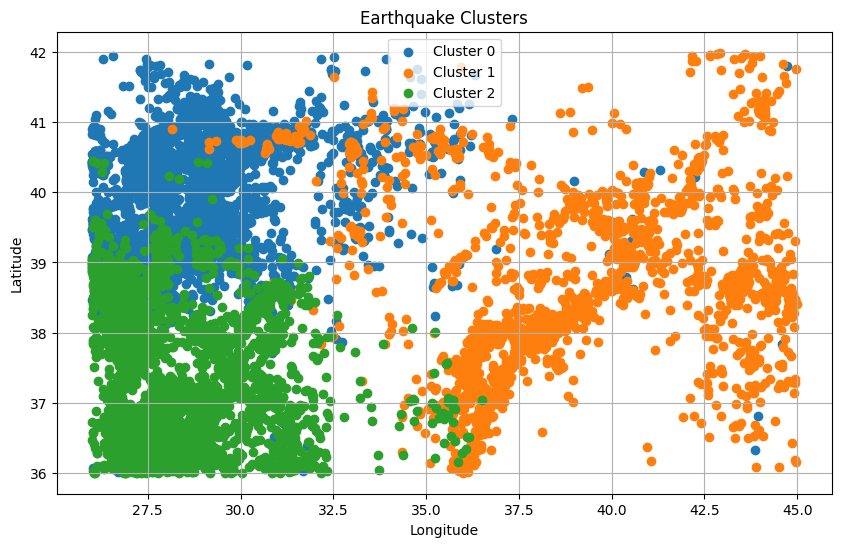

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = earthquake_data[earthquake_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Latitude'], label=f'Cluster {cluster}')
plt.title('Earthquake Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Load the dataset (assuming the file path and the structure of the data)

earthquake_data = pd.read_csv("earthquakes.csv")

# Preprocess the data
earthquake_data = earthquake_data.dropna(subset=['Magnitude'])  # Remove rows with NaN in Magnitude
features = earthquake_data[[ 'Longitude', 'Magnitude']]  # Selecting features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Scaling the features

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)
earthquake_data['Cluster'] = kmeans.labels_  # Assigning cluster labels to the original data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


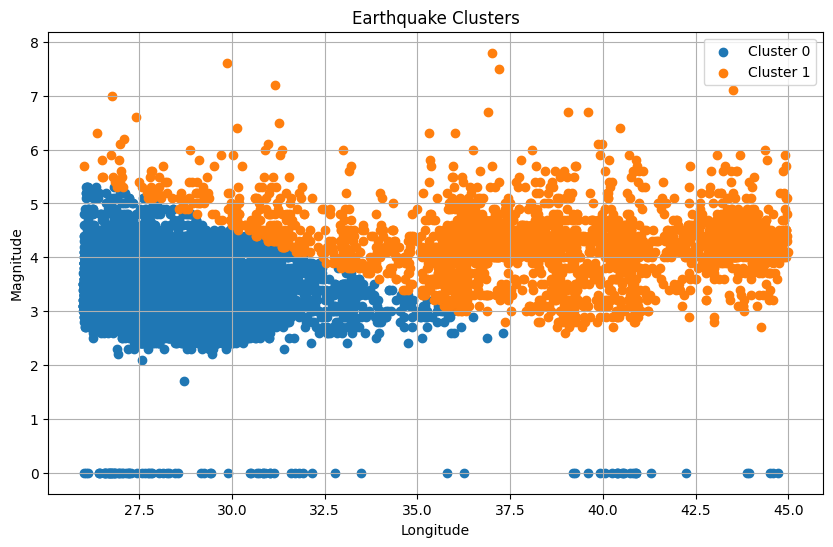

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(2):
    cluster_data = earthquake_data[earthquake_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Longitude'], cluster_data['Magnitude'], label=f'Cluster {cluster}')
plt.title('Earthquake Clusters')
plt.xlabel('Longitude')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Load the dataset (assuming the file path and the structure of the data)

earthquake_data = pd.read_csv("earthquakes.csv")

# Preprocess the data
earthquake_data = earthquake_data.dropna(subset=['Magnitude'])  # Remove rows with NaN in Magnitude
features = earthquake_data[[ 'Latitude', 'Magnitude']]  # Selecting features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Scaling the features

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)
earthquake_data['Cluster'] = kmeans.labels_  # Assigning cluster labels to the original data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


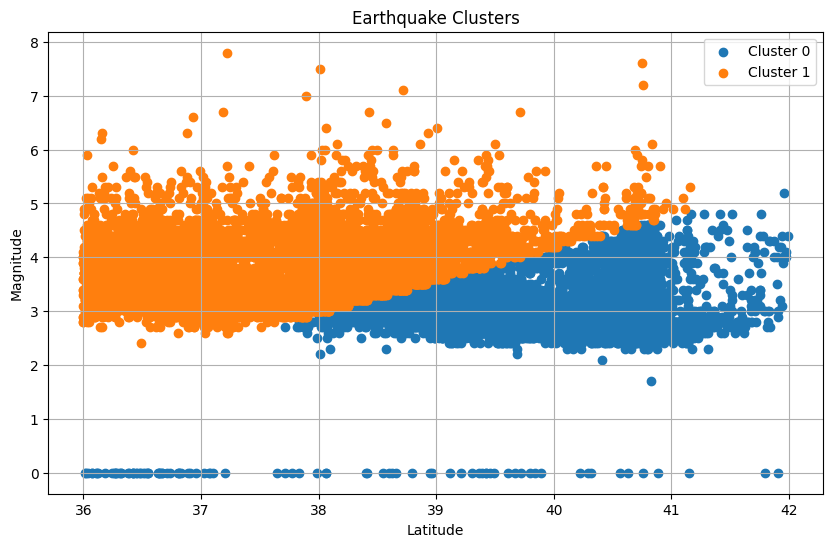

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(2):
    cluster_data = earthquake_data[earthquake_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Latitude'], cluster_data['Magnitude'], label=f'Cluster {cluster}')
plt.title('Earthquake Clusters')
plt.xlabel('Latitude')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Load the dataset (assuming the file path and the structure of the data)

earthquake_data = pd.read_csv("earthquakes.csv")

# Preprocess the data
earthquake_data = earthquake_data.dropna(subset=['Magnitude'])  # Remove rows with NaN in Magnitude
features = earthquake_data[[ 'Depth', 'Magnitude']]  # Selecting features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)  # Scaling the features

# Apply K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_features)
earthquake_data['Cluster'] = kmeans.labels_  # Assigning cluster labels to the original data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


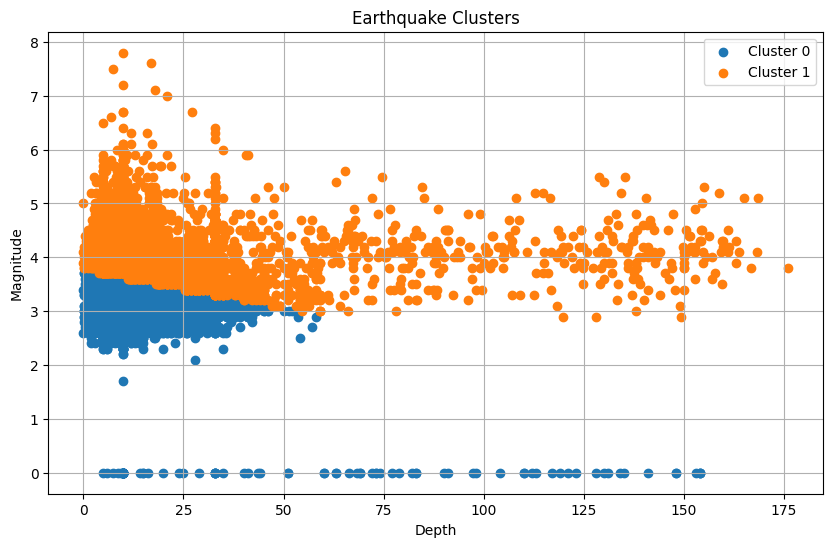

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(2):
    cluster_data = earthquake_data[earthquake_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Depth'], cluster_data['Magnitude'], label=f'Cluster {cluster}')
plt.title('Earthquake Clusters')
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import folium
import pandas as pd
import json
from folium.plugins import HeatMap



In [ ]:
df = pd.read_csv("earthquakes.csv")

df1 = df[df["Magnitude"] > 5]

# Load the JSON file
file_path = 'PB2002_boundaries.json'
with open(file_path, 'r') as file:
    data = json.load(file)
    # Create a folium map
m = folium.Map(location=[39, 35], zoom_start=6)

# Add the GeoJSON data to the map
folium.GeoJson(data, name="geojson").add_to(m)
#folium.GeoJson(data2,name="geojson").add_to(m)
heat_data = [[row["Latitude"], row["Longitude"]] for index, row in df1.iterrows()]
HeatMap(heat_data).add_to(m)
# Save the map to an HTML file
map_path = '/mnt/data/plate_boundaries_map.html'
m.save('your_map.html')


In [ ]:
m

In [ ]:
df = pd.read_csv("earthquakes.csv")

df1 = df[df["Magnitude"] > 5]

# Load the JSON file
file_path = 'PB2002_boundaries.json'
with open(file_path, 'r') as file:
    data = json.load(file)
    # Create a folium map
m = folium.Map(location=[39, 35], zoom_start=6)

# Add the GeoJSON data to the map
folium.GeoJson(data, name="geojson").add_to(m)
#folium.GeoJson(data2,name="geojson").add_to(m)
for index, row in df1.iterrows():
    folium.Marker(
        [row["Latitude"], row["Longitude"]],
        popup=f"Magnitude: {row['Magnitude']}, Time: {row['Time']}, Place: {row['Place']}"
    ).add_to(m)
# Save the map to an HTML file
map_path = '/mnt/data/plate_boundaries_map.html'
m.save('your_map2.html')


In [ ]:
m

In [ ]:
import pandas as pd
import json
from geopy.distance import distance

# Load the earthquake data
earthquakes = pd.read_csv("earthquakes.csv")

# Load the tectonic plate boundaries data
with open('PB2002_boundaries.json', 'r') as file:
    boundaries = json.load(file)

In [ ]:
# Function to calculate the distance to the nearest boundary
def nearest_boundary_distance(earthquake, boundaries):
    min_distance = float('inf')
    earthquake_coords = (earthquake["Latitude"], earthquake["Longitude"])

    for boundary in boundaries['features']:
        boundary_coords = boundary['geometry']['coordinates']
        for coord in boundary_coords:
            # Boundary coordinates can be a list of lists
            if isinstance(coord[0], list):
                for sub_coord in coord:
                    dist = distance(earthquake_coords, (sub_coord[1], sub_coord[0])).km
                    min_distance = min(min_distance, dist)
            else:
                dist = distance(earthquake_coords, (coord[1], coord[0])).km
                min_distance = min(min_distance, dist)

    return min_distance



In [ ]:

# Reduce the dataset to the first 10 rows
reduced_earthquakes = earthquakes.head(10)

# Calculate distances for the reduced dataset
reduced_earthquakes['distance_to_nearest_boundary'] = reduced_earthquakes.apply(lambda x: nearest_boundary_distance(x, boundaries), axis=1)

# Display the results
print(reduced_earthquakes)

                      Time  Magnitude                                Place  \
0  2023-12-04 10:42:19.839        5.1          7 km NNW of Mudanya, Turkey   
1  2023-12-01 03:18:50.229        4.5                                  NaN   
2  2023-11-23 17:49:57.542        4.7                                  NaN   
3  2023-11-23 17:46:09.198        5.3            5 km NW of Sincik, Turkey   
4  2023-11-20 10:36:05.993        4.4           18 km NE of Sincik, Turkey   
5  2023-11-20 03:55:05.257        4.1           10 km SE of Göksun, Turkey   
6  2023-11-17 16:19:30.517        4.2          22 km NW of Émponas, Greece   
7  2023-11-13 17:58:06.992        4.3  24 km SW of Sharur City, Azerbaijan   
8  2023-11-13 08:28:28.536        4.3        21 km SSW of Başmakçı, Turkey   
9  2023-11-11 12:05:32.446        4.2                       Western Turkey   

   Latitude  Longitude    Depth  distance_to_nearest_boundary  
0   40.4380    28.8561    6.458                     27.856654  
1   38.3431  

<ipython-input-42-81cec73f5f36>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_earthquakes['distance_to_nearest_boundary'] = reduced_earthquakes.apply(lambda x: nearest_boundary_distance(x, boundaries), axis=1)


In [ ]:
import pandas as pd
import json
from geopy.distance import geodesic

# Load the earthquake data
earthquakes = pd.read_csv("earthquakes.csv")

# Load the tectonic plate boundaries data
with open('PB2002_boundaries.json', 'r') as file:
    boundaries = json.load(file)

# Function to calculate the distance to the nearest boundary
def nearest_boundary_distance(earthquake, boundaries):
    min_distance = float('inf')
    earthquake_coords = (earthquake["Latitude"], earthquake["Longitude"])

    for boundary in boundaries['features']:
        boundary_coords = boundary['geometry']['coordinates']
        for coord in boundary_coords:
            # Boundary coordinates can be a list of lists
            if isinstance(coord[0], list):
                for sub_coord in coord:
                    dist = geodesic(earthquake_coords, (sub_coord[1], sub_coord[0])).kilometers
                    min_distance = min(min_distance, dist)
            else:
                dist = geodesic(earthquake_coords, (coord[1], coord[0])).kilometers
                min_distance = min(min_distance, dist)

    return min_distance

# Take a random sample of size 100 (for example) from the earthquake data
sampled_earthquakes = sorted_earthquakes = earthquakes.sort_values(by='Magnitude', ascending=False).head(100)



# Calculate distances for the sampled data
sampled_earthquakes['distance_to_nearest_boundary'] = sampled_earthquakes.apply(
    lambda x: nearest_boundary_distance(x, boundaries), axis=1)

sampled_earthquakes.head()  # Display the first few rows of the sampled data with distances


In [ ]:
# Calculating the correlation of 'distance_to_nearest_boundary' with 'Magnitude' and 'Depth'
correlation = sampled_earthquakes[['Magnitude', 'Depth', 'distance_to_nearest_boundary']].corr()

correlation

,Magnitude,Depth,distance_to_nearest_boundary
Magnitude,1.000000,-0.072041,-0.059239
Depth,-0.072041,1.000000,0.253072
distance_to_nearest_boundary,-0.059239,0.253072,1.000000


In [13]:
import json
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import shape

# Load the tectonic plate boundaries data
with open('PB2002_boundaries.json', 'r') as file:
    boundaries_data = json.load(file)

# Load the Turkish cities data
with open('tr-cities.json', 'r') as file:
    cities_data = json.load(file)



In [14]:
# Convert JSON data to GeoDataFrame
boundaries_gdf = gpd.GeoDataFrame.from_features(boundaries_data["features"])
cities_gdf = gpd.GeoDataFrame.from_features(cities_data["features"])

# Identifying the geometry for Denizli
İzmir_geometry = cities_gdf[cities_gdf["name"] == "İzmir"].iloc[0].geometry

# Identifying the geometry for Denizli
denizli_geometry = cities_gdf[cities_gdf["name"] == "Denizli"].iloc[0].geometry

# Function to calculate the minimum distance between a point (or polygon) and a set of geometries
def calculate_min_distance(geom, gdf):
    min_distance = np.min([geom.distance(other) for other in gdf.geometry])
    return min_distance

# Calculate the minimum distance from Denizli to the nearest tectonic plate boundary
min_distance_to_boundary = calculate_min_distance(denizli_geometry, boundaries_gdf)

min_distance_to_boundary2 = calculate_min_distance(İzmir_geometry, boundaries_gdf)
# Defining the bounding box for Turkey to zoom into the region
turkey_bbox = [25.6, 35.8, 44.8, 42.1]  # [minx, miny, maxx, maxy]



<ipython-input-15-b23d735b5847>:18: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


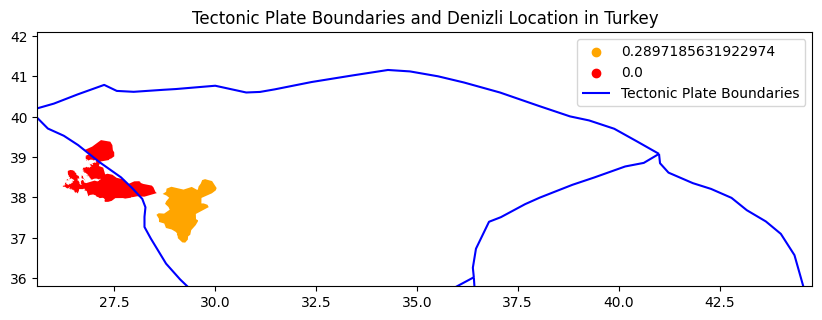

In [15]:
# Plotting the map with zoom to Turkey
fig, ax = plt.subplots(figsize=(10, 10))

# Set the bounds to the bounding box of Turkey
ax.set_xlim(turkey_bbox[0], turkey_bbox[2])
ax.set_ylim(turkey_bbox[1], turkey_bbox[3])
ax.scatter([], [], color='Orange', label=min_distance_to_boundary)
ax.scatter([], [], color='Red', label=min_distance_to_boundary2)
# Plot tectonic plate boundaries
boundaries_gdf.plot(ax=ax, color='blue', label='Tectonic Plate Boundaries')

# Plot Denizli
gpd.GeoSeries([denizli_geometry]).plot(ax=ax, color='Orange', label='Denizli')

gpd.GeoSeries([İzmir_geometry]).plot(ax=ax, color='red', label='İzmir')
# Setting additional plot parameters
ax.set_title('Tectonic Plate Boundaries and Denizli Location in Turkey')
ax.legend()
plt.show()


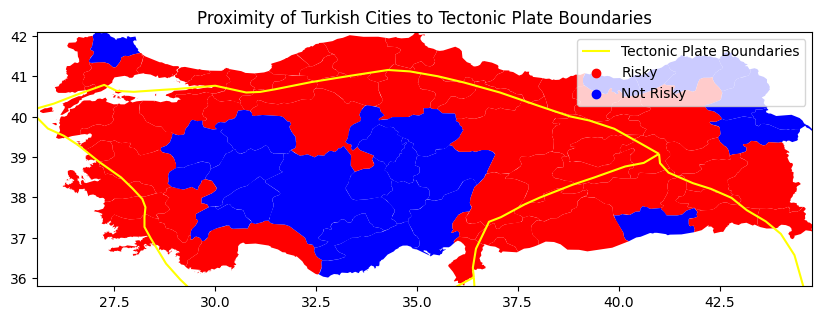

In [ ]:
def analyze_and_plot_all_cities(cities_list, cities_gdf, boundaries_gdf, turkey_bbox, red_scale):
    """
    Perform proximity analysis for multiple cities and plot their locations on a single map with generalized labels.
    Cities closer than red_scale are marked as 'Risky' in red, others are marked as 'Not Risky' in blue.

    :param cities_list: List of city names.
    :param cities_gdf: GeoDataFrame containing city geometries.
    :param boundaries_gdf: GeoDataFrame containing tectonic plate boundaries.
    :param turkey_bbox: Bounding box for Turkey.
    :param red_scale: Distance threshold for marking cities as 'Risky'.
    """
    cities_to_analyze = [
 'Adana',
 'Adıyaman',
 'Afyon',
 'Ağrı',
 'Aksaray',
 'Amasya',
 'Ankara',
 'Antalya',
 'Ardahan',
 'Artvin',
 'Aydın',
 'Balıkesir',
 'Bartın',
 'Batman',
 'Bayburt',
 'Bilecik',
 'Bingöl',
 'Bitlis',
 'Bolu',
 'Burdur',
 'Bursa',
 'Çanakkale',
 'Çankırı',
 'Çorum',
 'Denizli',
 'Diyarbakır',
 'Düzce',
 'Edirne',
 'Elazığ',
 'Erzincan',
 'Erzurum',
 'Eskişehir',
 'Gaziantep',
 'Giresun',
 'Gümüşhane',
 'Hakkari',
 'Hatay',
 'Iğdır',
 'Isparta',
 'İstanbul',
 'İzmir',
 'Kahramanmaraş',
 'Karabük',
 'Karaman',
 'Kars',
 'Kastamonu',
 'Kayseri',
 'Kilis',
 'Kırıkkale',
 'Kırklareli',
 'Kırşehir',
 'Kocaeli',
 'Konya',
 'Kütahya',
 'Malatya',
 'Manisa',
 'Mardin',
 'Mersin',
 'Muğla',
 'Muş',
 'Nevşehir',
 'Niğde',
 'Ordu',
 'Osmaniye',
 'Rize',
 'Sakarya',
 'Samsun',
 'Şanlıurfa',
 'Siirt',
 'Sinop',
 'Şırnak',
 'Sivas',
 'Tekirdağ',
 'Tokat',
 'Trabzon',
 'Tunceli',
 'Uşak',
 'Van',
 'Yalova',
 'Yozgat',
 'Zonguldak'
 ]


    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlim(turkey_bbox[0], turkey_bbox[2])
    ax.set_ylim(turkey_bbox[1], turkey_bbox[3])
    boundaries_gdf.plot(ax=ax, color='yellow', label='Tectonic Plate Boundaries')

    # Plot sample points for the legend
    ax.scatter([], [], color='red', label='Risky')
    ax.scatter([], [], color='blue', label='Not Risky')

    for city in cities_list:
        if city in cities_gdf["name"].values:
            city_geometry = cities_gdf[cities_gdf["name"] == city].iloc[0].geometry
            min_distance = calculate_min_distance(city_geometry, boundaries_gdf)
            color = 'red' if min_distance < red_scale else 'blue'
            gpd.GeoSeries([city_geometry]).plot(ax=ax, color=color)

    ax.set_title('Proximity of Turkish Cities to Tectonic Plate Boundaries')
    ax.legend()
    plt.show()

# Example usage
red_scale_distance = 0.4  # Set your threshold here
analyze_and_plot_all_cities(cities_to_analyze, cities_gdf, boundaries_gdf, turkey_bbox, red_scale_distance)

In [4]:
pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 57.1 MB/s eta 0:00:00


In [5]:
from pulp import LpProblem, LpBinary, LpMinimize, LpVariable, lpSum

In [6]:
n = 19

nüfus = [54888, 6340, 5296, 6424, 6197, 12331, 26630, 17889, 17549, 8452, 59967, 9448, 34074, 19202, 336818, 347926,
        30834, 14355, 41712]

mesafe = [
    [0, 91, 100, 127, 106, 90, 102, 104, 48, 96, 134, 129, 61, 69, 63, 68, 77, 19, 45],
    [91, 0, 90, 117, 141, 80, 42, 94, 140, 86, 124, 69, 51, 103, 42, 46, 17, 72, 80],
    [100, 90, 0, 64, 150, 45, 101, 40, 149, 51, 40, 77, 55, 112, 62, 67, 77, 81, 89],
    [127, 117, 64, 0, 176, 72, 127, 23, 175, 77, 41, 59, 81, 139, 88, 94, 103, 108, 115],
    [106, 141, 150, 176, 0, 140, 151, 153, 155, 145, 184, 179, 110, 38, 112, 118, 127, 87, 63],
    [90, 80, 45, 72, 140, 0, 91, 48, 139, 6, 79, 85, 44, 102, 52, 57, 66, 71, 79],
    [102, 42, 101, 127, 151, 91, 0, 104, 150, 96, 135, 34, 61, 114, 52, 57, 24, 83, 90],
    [104, 94, 40, 23, 153, 48, 104, 0, 152, 54, 43, 36, 58, 116, 65, 70, 80, 84, 92],
    [48, 140, 149, 175, 155, 139, 150, 152, 0, 144, 182, 177, 109, 117, 111, 116, 126, 68, 94],
    [96, 86, 51, 77, 145, 6, 96, 54, 144, 0, 84, 90, 50, 108, 57, 63, 72, 76, 84],
    [134, 124, 40, 41, 184, 79, 135, 43, 182, 84, 0, 79, 88, 146, 95, 101, 110, 115, 123],
    [129, 69, 77, 59, 179, 85, 34, 36, 177, 90, 79, 0, 89, 141, 80, 84, 52, 110, 118],
    [61, 51, 55, 81, 110, 44, 61, 58, 109, 50, 88, 89, 0, 73, 22, 28, 37, 42, 49],
    [69, 103, 112, 139, 38, 102, 114, 116, 117, 108, 146, 141, 73, 0, 75, 80, 90, 49, 25],
    [63, 42, 62, 88, 112, 52, 52, 65, 111, 57, 95, 80, 22, 75, 0, 19, 28, 43, 51],
    [68, 46, 67, 94, 118, 57, 57, 70, 116, 63, 101, 84, 28, 80, 19, 0, 33, 49, 57],
    [77, 17, 77, 103, 127, 66, 24, 80, 126, 72, 110, 52, 37, 90, 28, 33, 0, 58, 66],
    [19, 72, 81, 108, 87, 71, 83, 84, 68, 76, 115, 110, 42, 49, 43, 49, 58, 0, 26],
    [45, 80, 89, 115, 63, 79, 90, 92, 94, 84, 123, 118, 49, 25, 51, 57, 66, 26, 0]
]


gruplar = [
    [11, 4, 8, 3, 6, 13, 10],
    [7, 12, 17, 16, 15, 2],
    [1, 9, 18],
    [14, 19, 5]
]

maksimum_mesafe = 120  # Replace with your specific maximum distance

ilceler=[
    "Acıpayam",
    "Babadağ"	,
    "Baklan",
    "Bekilli"	,
    "Beyağaç"	,
    "Bozkurt"	,
    "Buldan	",
    "Çal",
    "Çameli"	,
    "Çardak",
    "Çivril",
    "Güney",
    "Honaz",
    "Kale",
    "Merkezefendi"	,
    "Pamukkale",
    "Sarayköy	",
    "Serinhisar"	,
    "Tavas"
]


In [61]:
locations = [
    ("Acıpayam", 37.4279, 29.351055, 722),
    ("Babadağ", 37.8102, 28.85896, 623),
    ("Baklan", 37.9767, 29.60695, 800),
    ("Bekilli", 38.2302, 29.41887, 512),
    ("Beyağaç", 37.2360, 28.89756, 922),
    ("Bozkurt", 37.8210, 29.606, 412),
    ("Buldan", 38.0442, 28.834, 627),
    ("Çal", 38.0830, 29.398, 320),
    ("Çameli", 37.0768, 29.351, 518),
    ("Çardak", 37.8252, 29.669, 69),
    ("Çivril", 38.3021, 29.740, 361),
    ("Güney", 38.1555, 29.064, 710),
    ("Honaz", 37.7570, 29.264, 332),
    ("Kale", 37.4521, 28.851, 121),
    ("Merkezefendi", 37.7737, 29.060, 5271),
    ("Pamukkale", 37.9186, 29.110, 3320),
    ("Sarayköy", 37.9245, 28.923, 129),
    ("Serinhisar", 37.5880, 29.266, 14),
    ("Tavas", 37.5731, 29.071, 346)
]
for location in locations:
    ilceadi = location[0]
    enlem = location[1]
    boylam = location[2]
    nufus = location[3]

    print(f"Ilce: {ilceadi}, Enlem: {enlem}, Boylam: {boylam}, Nufus: {nufus}")

Ilce: Acıpayam, Enlem: 37.4279, Boylam: 29.351055, Nufus: 722
Ilce: Babadağ, Enlem: 37.8102, Boylam: 28.85896, Nufus: 623
Ilce: Baklan, Enlem: 37.9767, Boylam: 29.60695, Nufus: 800
Ilce: Bekilli, Enlem: 38.2302, Boylam: 29.41887, Nufus: 512
Ilce: Beyağaç, Enlem: 37.236, Boylam: 28.89756, Nufus: 922
Ilce: Bozkurt, Enlem: 37.821, Boylam: 29.606, Nufus: 412
Ilce: Buldan, Enlem: 38.0442, Boylam: 28.834, Nufus: 627
Ilce: Çal, Enlem: 38.083, Boylam: 29.398, Nufus: 320
Ilce: Çameli, Enlem: 37.0768, Boylam: 29.351, Nufus: 518
Ilce: Çardak, Enlem: 37.8252, Boylam: 29.669, Nufus: 69
Ilce: Çivril, Enlem: 38.3021, Boylam: 29.74, Nufus: 361
Ilce: Güney, Enlem: 38.1555, Boylam: 29.064, Nufus: 710
Ilce: Honaz, Enlem: 37.757, Boylam: 29.264, Nufus: 332
Ilce: Kale, Enlem: 37.4521, Boylam: 28.851, Nufus: 121
Ilce: Merkezefendi, Enlem: 37.7737, Boylam: 29.06, Nufus: 5271
Ilce: Pamukkale, Enlem: 37.9186, Boylam: 29.11, Nufus: 3320
Ilce: Sarayköy, Enlem: 37.9245, Boylam: 28.923, Nufus: 129
Ilce: Serinhisar

/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


Objective Value:  -504493.0
Facilities opened in districts:

Facilities in district groups:
Grup 1: [11]
Grup 2: [16]
Grup 3: [1]
Grup 4: [19]
1. district : Acıpayam
11. district : Çivril
16. district : Pamukkale
19. district : Tavas


<ipython-input-183-6ba7ceed5f2d>:86: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


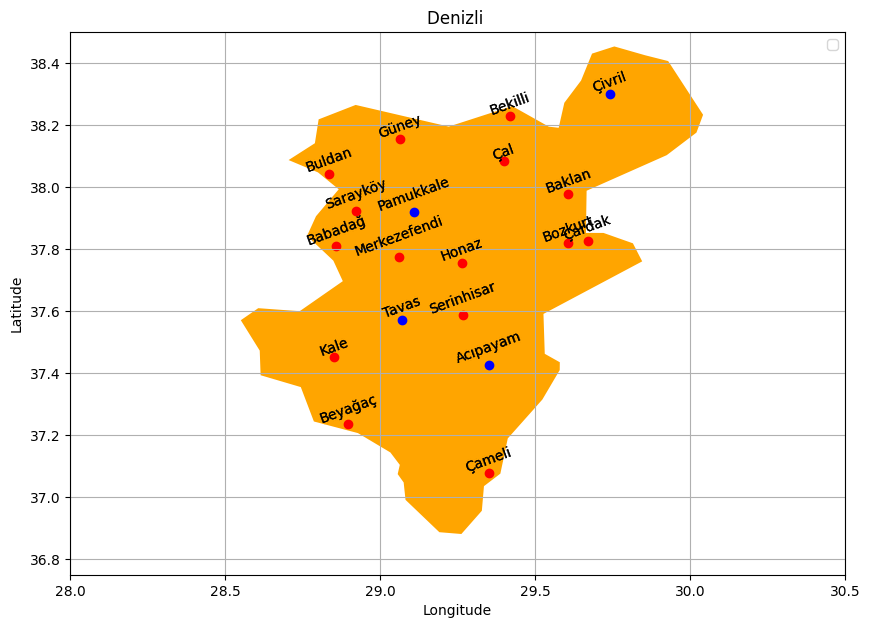

In [183]:
from pulp import LpProblem, LpVariable, lpSum, LpBinary
import numpy as np


def optimize_facility_location(min_tesis_sayisi,gruplar):
    # Your existing code goes here...

    # Create the optimization problem
    model = LpProblem(name="senaryo1", sense=LpMinimize)

    # Decision variables
    x = {(i, j): LpVariable(cat=LpBinary, name=f"x_{i}_{j}") for i in range(1, n + 1) for j in range(1, n + 1)}
    z = {i: LpVariable(cat=LpBinary, name=f"z_{i}") for i in range(1, n + 1)}

    # Objective function
    model += lpSum(mesafe[i - 1][j - 1] * x[i, j] for i in range(1, n + 1) for j in range(1, n + 1)) - \
             lpSum(nüfus[i - 1] * z[i] for i in range(1, n + 1))

    # Constraints
    for i in range(1, n + 1):
        model += lpSum(x[i, j] for j in range(1, n + 1)) <= 1  # Each district can have at most one facility

    for group in gruplar:
        model += lpSum(z[i] for i in group) >= 1



    # Minimum facility constraint
    model += lpSum(z[i] for i in range(1, n + 1)) == min_tesis_sayisi

    # Distance constraint
    for i in range(1, n + 1):
        for j in range(1, n + 1):
            model += mesafe[i - 1][j - 1] * x[i, j] + mesafe[j - 1][i - 1] * x[j, i] <= maksimum_mesafe


    # New objective function
    model += lpSum(mesafe[i - 1][j - 1] * x[i, j] for i in range(1, n + 1) for j in range(1, n + 1)) - \
             lpSum(nüfus[i - 1] * z[i] for i in range(1, n + 1))

    # Solve the problem
    model.solve()

    ilceoutputlist = []
    ilceoutputlist1 = []
    # Print results
    print("Objective Value: ", model.objective.value())
    print("Facilities opened in districts:")
    print("\nFacilities in district groups:")
    for g, gruplar in enumerate(gruplar, 1):
        facilities = [i for i in gruplar if any(z[i].value() == 1 for j in range(1, n + 1))]
        if facilities:
            print(f"Grup {g}: {facilities}")
    for i in range(1, n + 1):
        if z[i].value() == 1:
            ilceoutputlist.append(ilceler[i - 1])
            ilceoutputlist1.append(i-1)
            print(f"{i}. district : " + ilceler[i - 1])

    # Plotting the map with zoom to Turkey
    fig, ax = plt.subplots(figsize=(10, 10))

    # Set the bounds to the bounding box of Turkey
    ax.set_xlim(28,30.5)
    ax.set_ylim(36.75, 38.5)

    latitudesilce = [location[1] for location in locations]
    longitudesilce = [location[2] for location in locations]
    district_names = [location[0] for location in locations]


    gpd.GeoSeries([denizli_geometry]).plot(ax=ax, color='Orange', label='Denizli')
    # Plotting districts in ilceoutputlist in blue
    for i, name in enumerate(district_names):
        color = 'blue' if name in ilceoutputlist else 'red'
        plt.scatter(longitudesilce[i], latitudesilce[i], marker='o', color=color)
        plt.annotate(name, (longitudesilce[i], latitudesilce[i]), textcoords="offset points", xytext=(0, 1), ha='center',
                    rotation=20)
    # Annotate each point with the corresponding district name
    for i, name in enumerate(district_names):
        plt.annotate(name, (longitudesilce[i], latitudesilce[i]), textcoords="offset points", xytext=(0,1), ha='center', rotation=20)

    ax.set_title('Denizli ')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    ax.legend()
    plt.grid(True)
    plt.show()



optimize_facility_location(4,gruplar)



In [66]:
min_tesis_sayisi = 1
gruplar = [
    [11, 4, 8, 3, 6, 13, 10],
    [7, 12, 17, 16, 15, 2],
    [1, 9, 18],
    [14, 19, 5]
]

for i in range(7):
    print("------------------------------")
    optimize_facility_location(min_tesis_sayisi,gruplar)

    print("------------------------------")
    min_tesis_sayisi+=1


------------------------------
Objective Value:  -347926.0
Facilities opened in districts:
16. district : Pamukkale

Facilities in district groups:
Grup 2: [16]
------------------------------
------------------------------
Objective Value:  -684744.0
Facilities opened in districts:
15. district : Merkezefendi
16. district : Pamukkale

Facilities in district groups:
Grup 2: [16, 15]
------------------------------
------------------------------
Objective Value:  -744711.0
Facilities opened in districts:
11. district : Çivril
15. district : Merkezefendi
16. district : Pamukkale

Facilities in district groups:
Grup 1: [11]
Grup 2: [16, 15]
------------------------------
------------------------------
Objective Value:  -799599.0
Facilities opened in districts:
1. district : Acıpayam
11. district : Çivril
15. district : Merkezefendi
16. district : Pamukkale

Facilities in district groups:
Grup 1: [11]
Grup 2: [16, 15]
Grup 3: [1]
------------------------------
------------------------------
